<a href="https://colab.research.google.com/github/safiyenarman/DSA210-Project/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization
> This notebook includes:
> - Exploratory Data Analysis (EDA) via visualizations.
> - Normalization of scores for comparison.
> - Year-wise comparisons of top and bottom countries.
> - Hypothesis testing (Pearson correlation and t-test) for statistical relationships between SDG and Happiness ranks.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mergedData.csv")


df_normalized = df.copy()
df_normalized['SDG Score %'] = df.groupby('Year')['SDG Score'].transform(lambda x: 100 * (x - x.min()) / (x.max() - x.min()))
df_normalized['Happiness score %'] = df.groupby('Year')['Happiness score'].transform(lambda x: 100 * (x - x.min()) / (x.max() - x.min()))


### Distribution Shifts in Happiness Scores

The histograms below, reveal a shift toward lower happiness scores in 2019,2020,2021 and 2022.

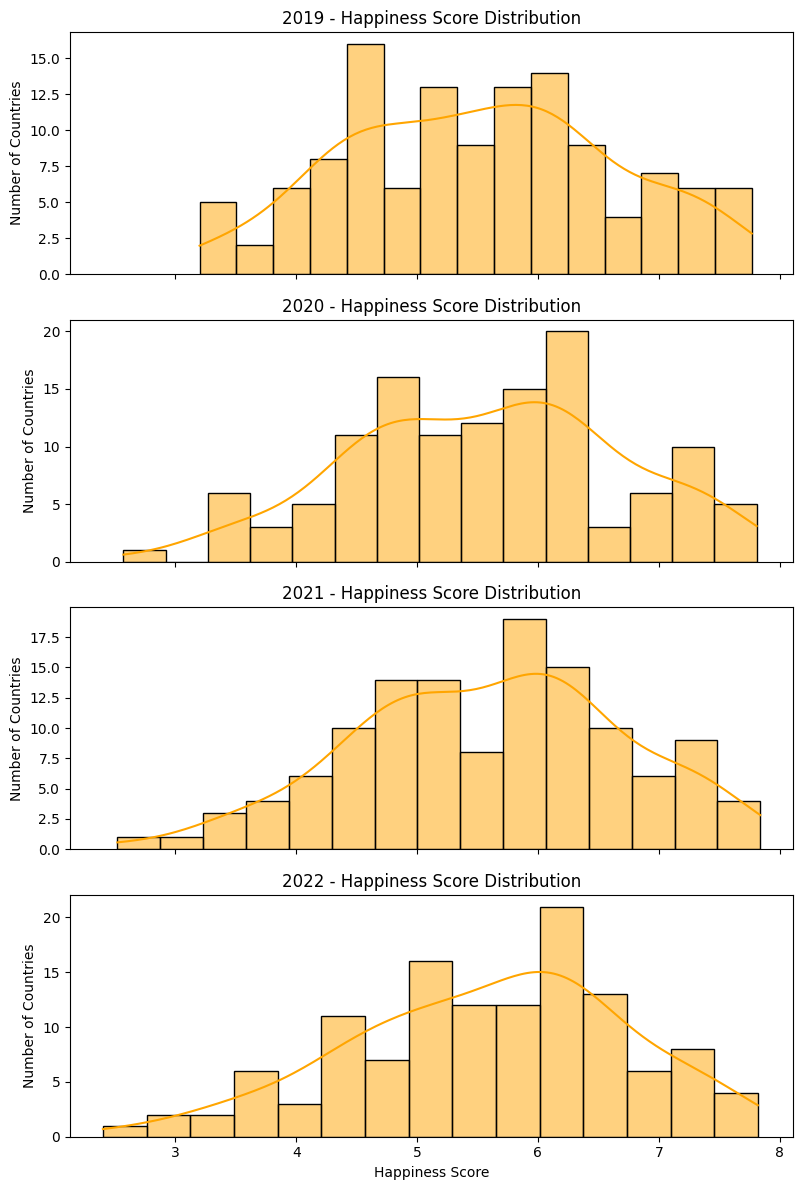

In [ ]:
years = sorted(df['Year'].unique())

fig, axes = plt.subplots(len(years), 1, figsize=(8, 12), sharex=True)

for i, year in enumerate(years):
    data = df[df['Year'] == year]
    sns.histplot(data['Happiness score'], kde=True, bins=15, color='orange', ax=axes[i])
    axes[i].set_title(f"{year} - Happiness Score Distribution")
    axes[i].set_ylabel("Number of Countries")

axes[-1].set_xlabel("Happiness Score")
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()


### Distribution Shifts in SDG Scores

The histograms below, reveal a shift toward lower SDG scores in 2019,2020,2021 and 2022.

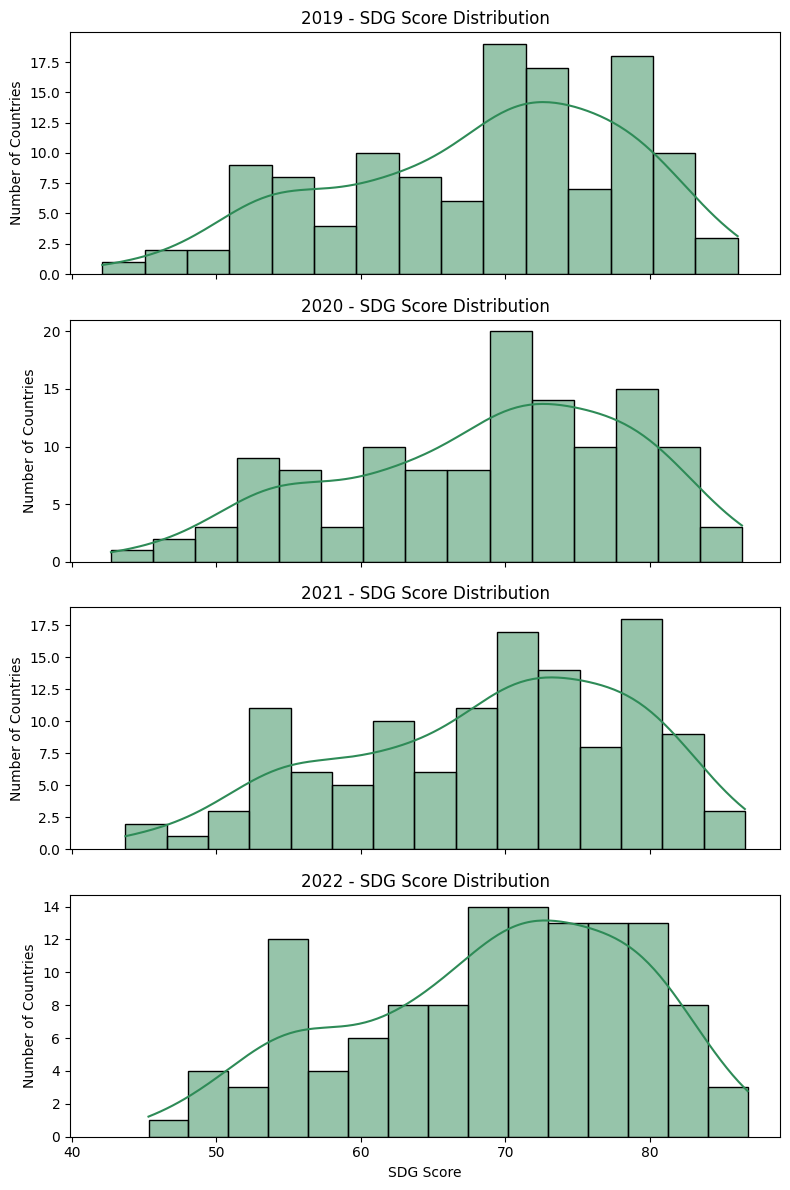

In [ ]:
years = sorted(df['Year'].unique())

fig, axes = plt.subplots(len(years), 1, figsize=(8, 12), sharex=True)

for i, year in enumerate(years):
    data = df[df['Year'] == year]
    sns.histplot(data['SDG Score'], kde=True, bins=15, color='seagreen', ax=axes[i])
    axes[i].set_title(f"{year} - SDG Score Distribution")
    axes[i].set_ylabel("Number of Countries")

axes[-1].set_xlabel("SDG Score")
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()


### Comparison of Top 20 Countries by SDG Score and Happiness Score in 2019-2022

Those bar charts below, compares the top 20 countries in 2019-2022 based on Sustainable Development Goal (SDG) scores (left) and Happiness scores (right).This visual comparison suggests that sustainable development and well-being are correlated, as can be understood from most of countries from the top 20 happiness ranking appears in the SDG ranking, with the fact that their position may vary.

<ipython-input-21-3630c7d1b1eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='SDG Score', data=top_sdg, ax=axes[0], palette='viridis')
<ipython-input-21-3630c7d1b1eb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='Happiness score', data=top_happy, ax=axes[1], palette='coolwarm')


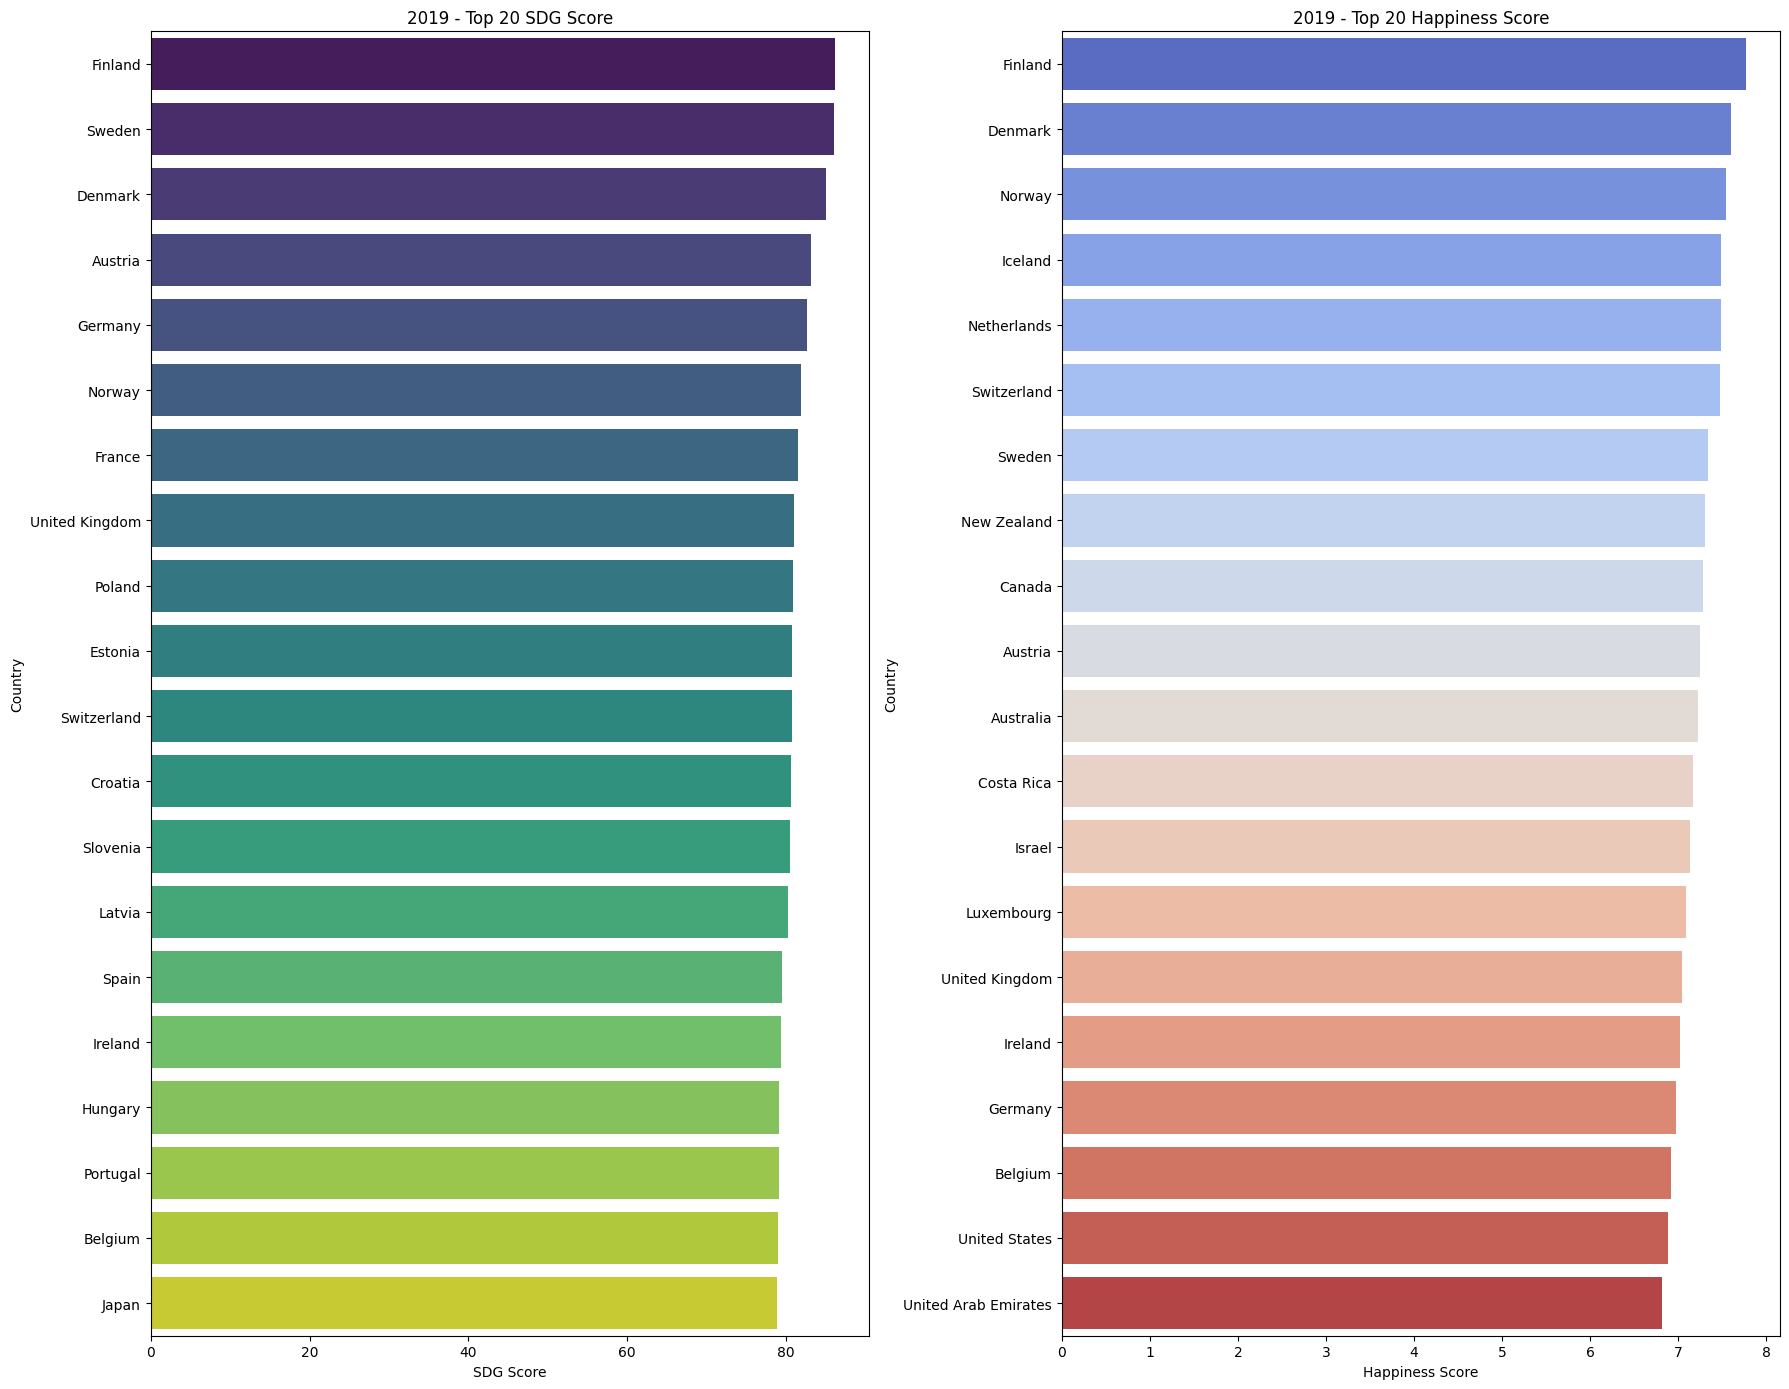

<ipython-input-21-3630c7d1b1eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='SDG Score', data=top_sdg, ax=axes[0], palette='viridis')
<ipython-input-21-3630c7d1b1eb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='Happiness score', data=top_happy, ax=axes[1], palette='coolwarm')


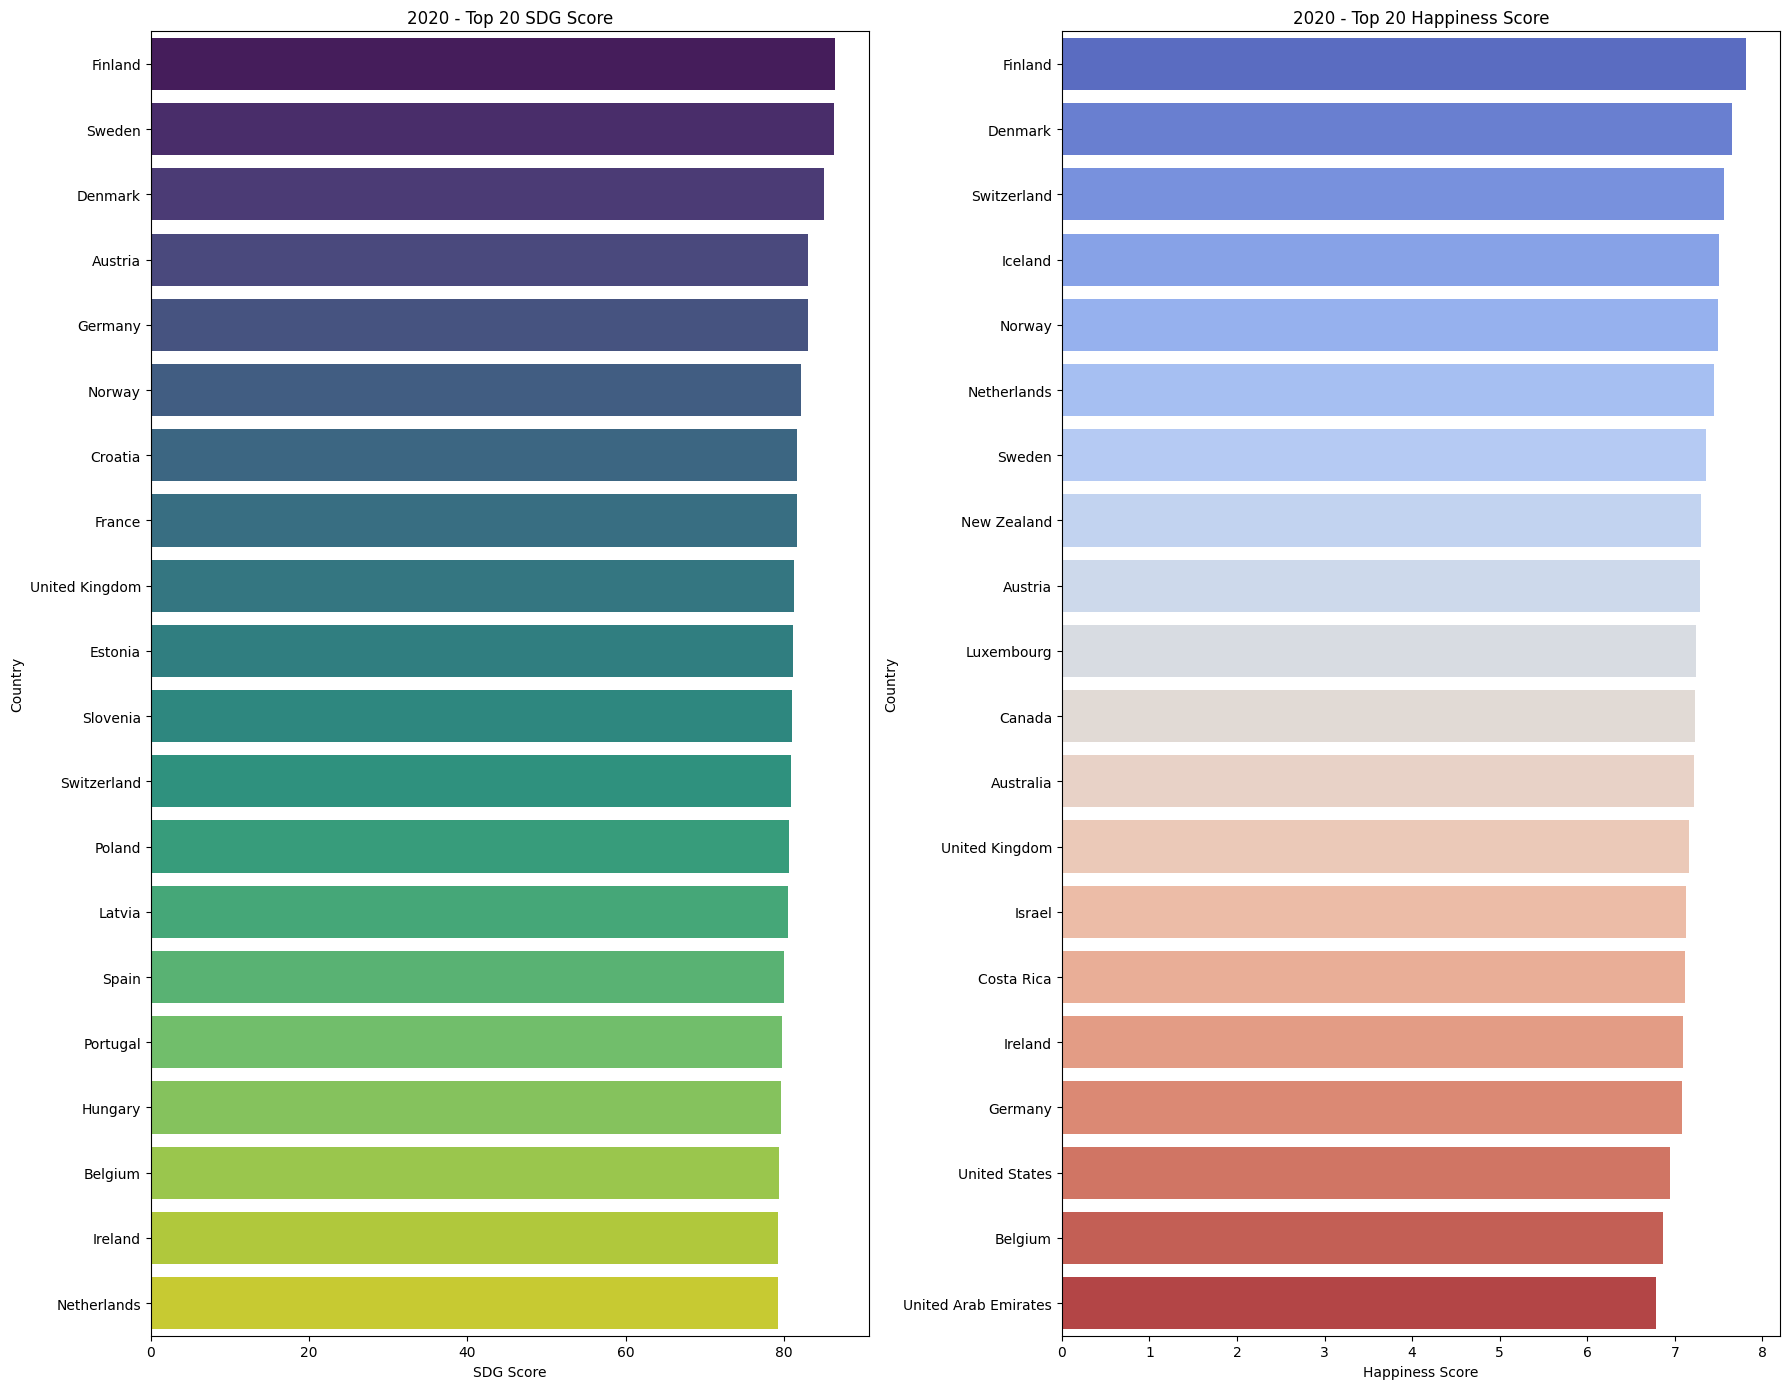

<ipython-input-21-3630c7d1b1eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='SDG Score', data=top_sdg, ax=axes[0], palette='viridis')
<ipython-input-21-3630c7d1b1eb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='Happiness score', data=top_happy, ax=axes[1], palette='coolwarm')


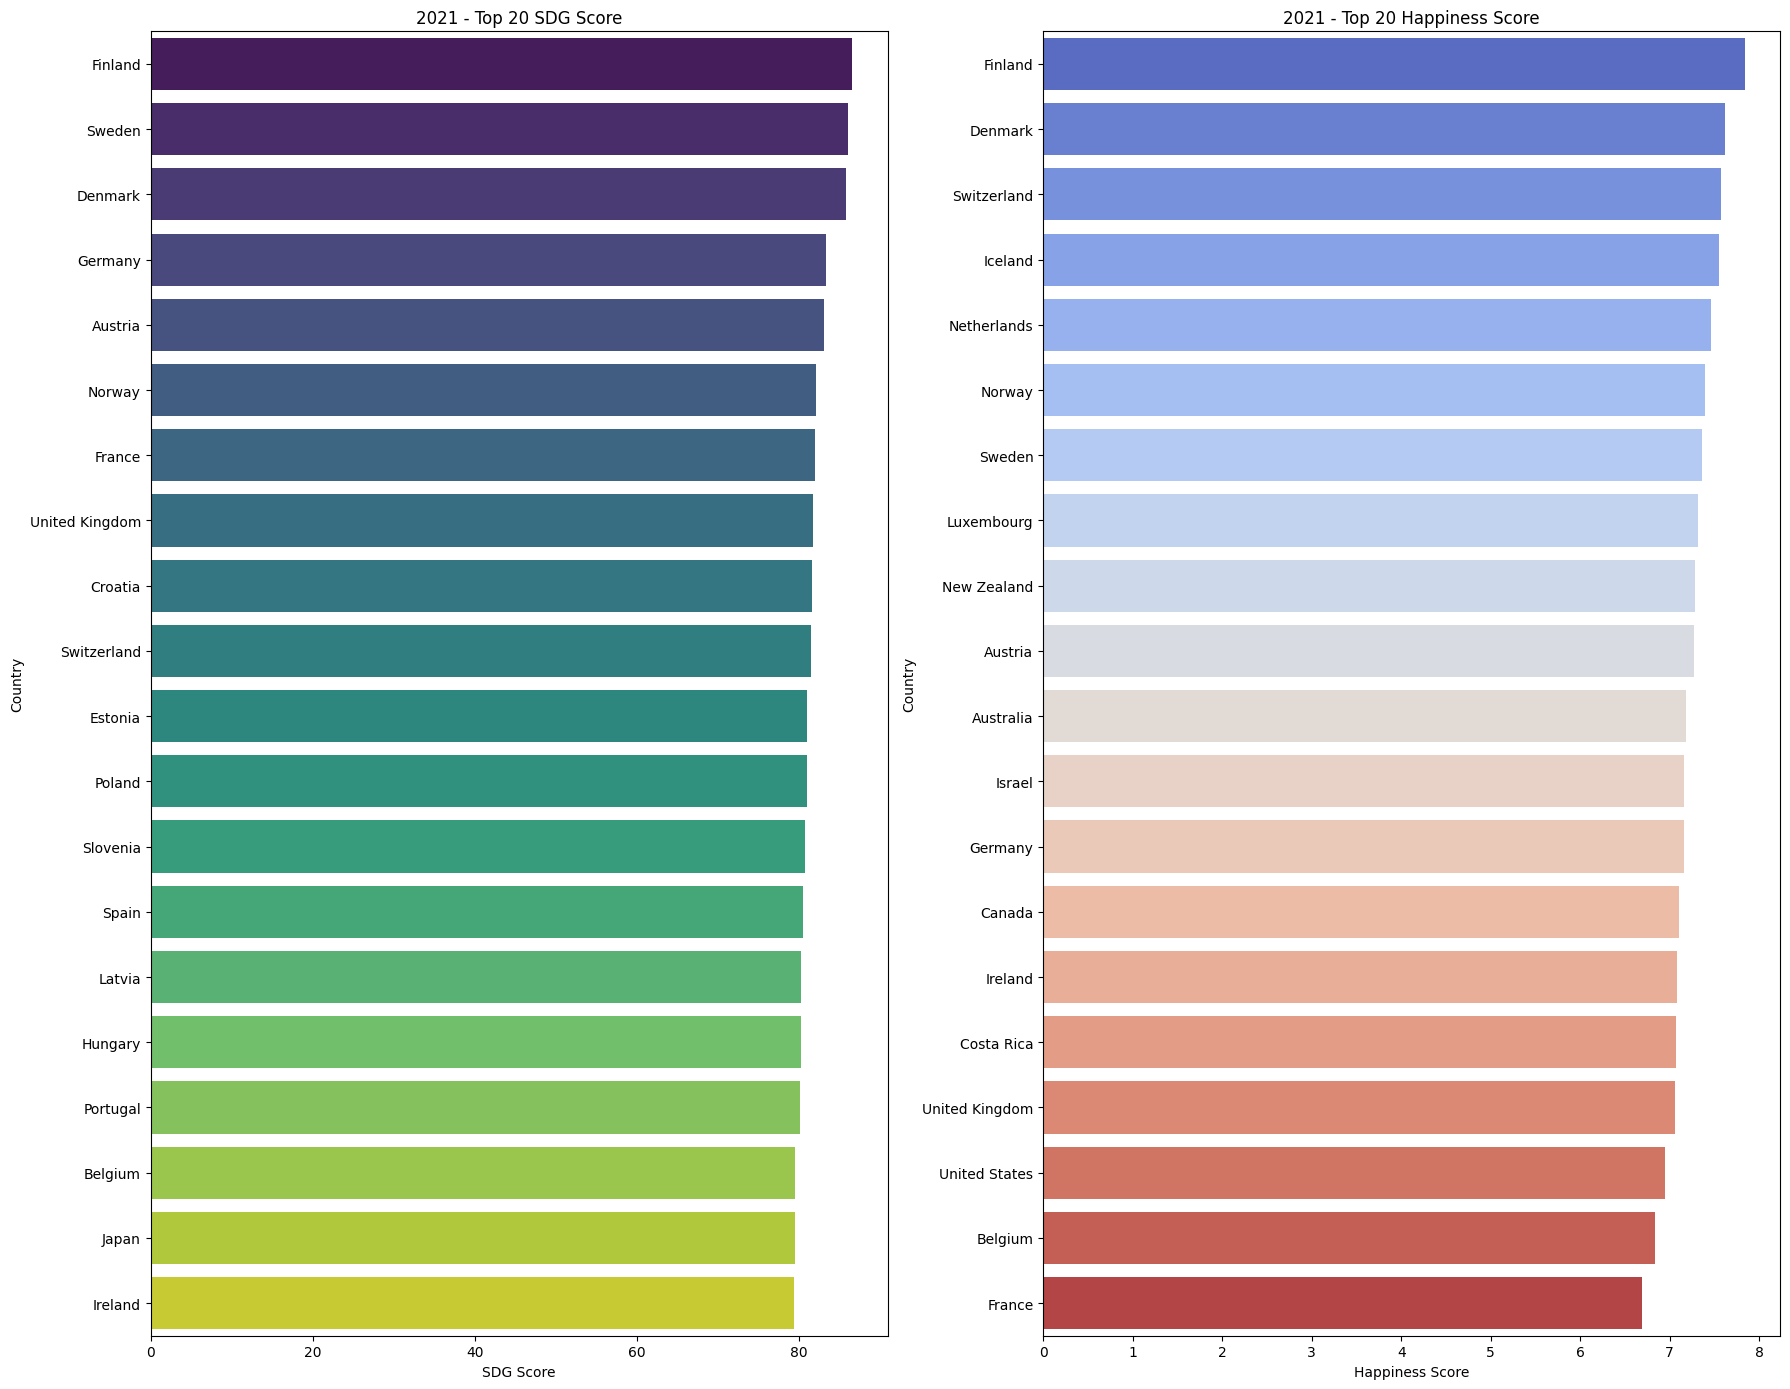

<ipython-input-21-3630c7d1b1eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='SDG Score', data=top_sdg, ax=axes[0], palette='viridis')
<ipython-input-21-3630c7d1b1eb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='Happiness score', data=top_happy, ax=axes[1], palette='coolwarm')


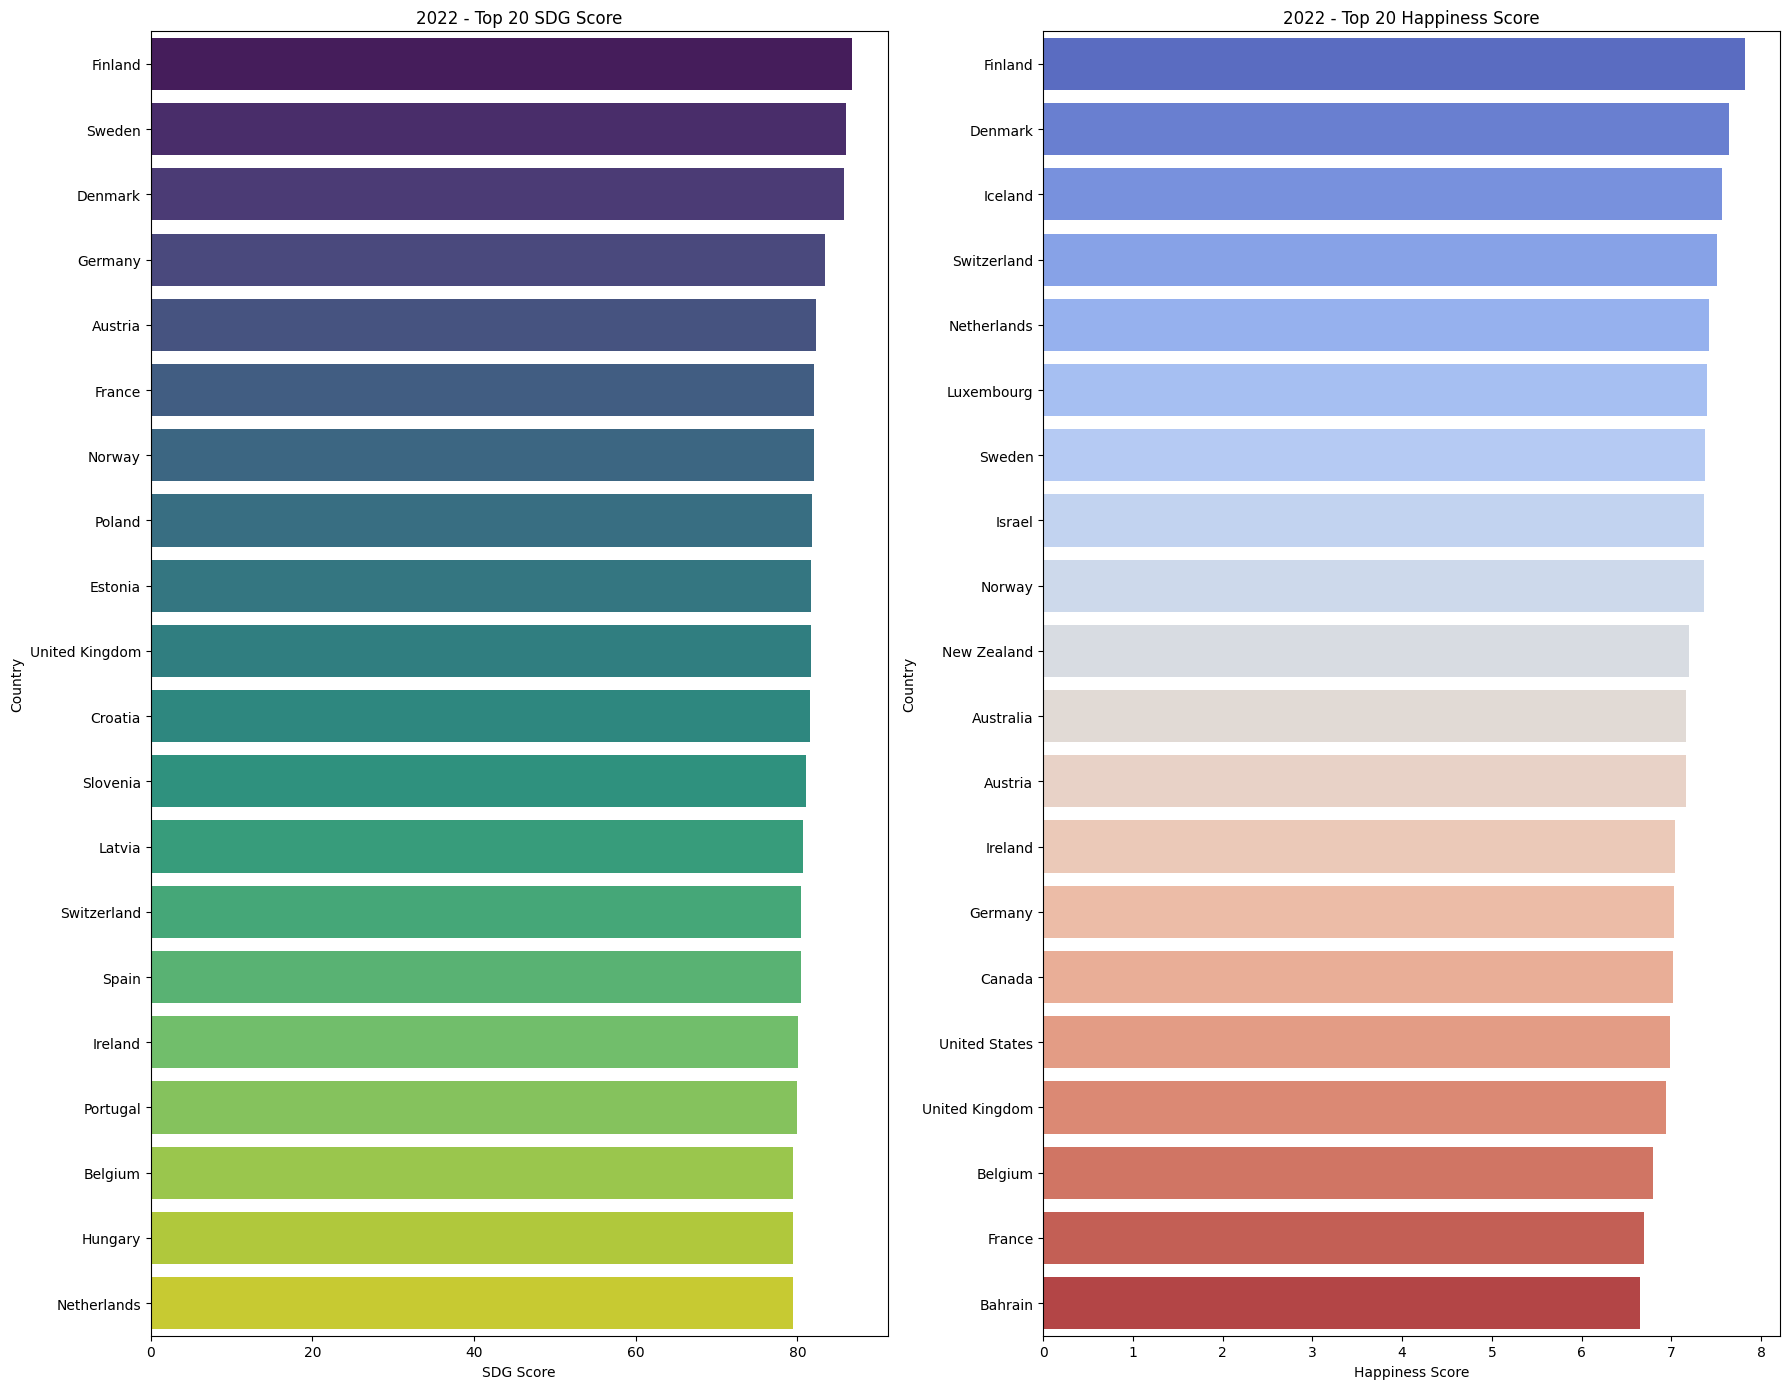

In [ ]:
for year in years:
    data_year = df[df['Year'] == year]

    top_sdg = data_year.sort_values(by='SDG Score', ascending=False).head(20)
    top_happy = data_year.sort_values(by='Happiness score', ascending=False).head(20)

    fig, axes = plt.subplots(1, 2, figsize=(18, 14))

    sns.barplot(y='Country', x='SDG Score', data=top_sdg, ax=axes[0], palette='viridis')
    axes[0].set_title(f"{year} - Top 20 SDG Score")
    axes[0].set_xlabel("SDG Score")
    axes[0].set_ylabel("Country")

    sns.barplot(y='Country', x='Happiness score', data=top_happy, ax=axes[1], palette='coolwarm')
    axes[1].set_title(f"{year} - Top 20 Happiness Score")
    axes[1].set_xlabel("Happiness Score")
    axes[1].set_ylabel("Country")

    plt.tight_layout()
    plt.show()


### Comparison of Worst 20 Countries by SDG Score and Happiness Score in 2019-2022

Those bar charts below, compares the worst 20 countries in 2019-2022 based on Sustainable Development Goal (SDG) scores (left) and Happiness scores (right).This visual comparison suggests that sustainable development and well-being are correlated, as can be understood from most of countries from the worst 20 happiness ranking appears in the worst SDG rankings, with the fact that their position may vary.

<ipython-input-22-f9c43b933dde>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='SDG Score', data=worst_sdg, ax=axes[0], palette='viridis_r')
<ipython-input-22-f9c43b933dde>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='Happiness score', data=worst_happy, ax=axes[1], palette='coolwarm_r')


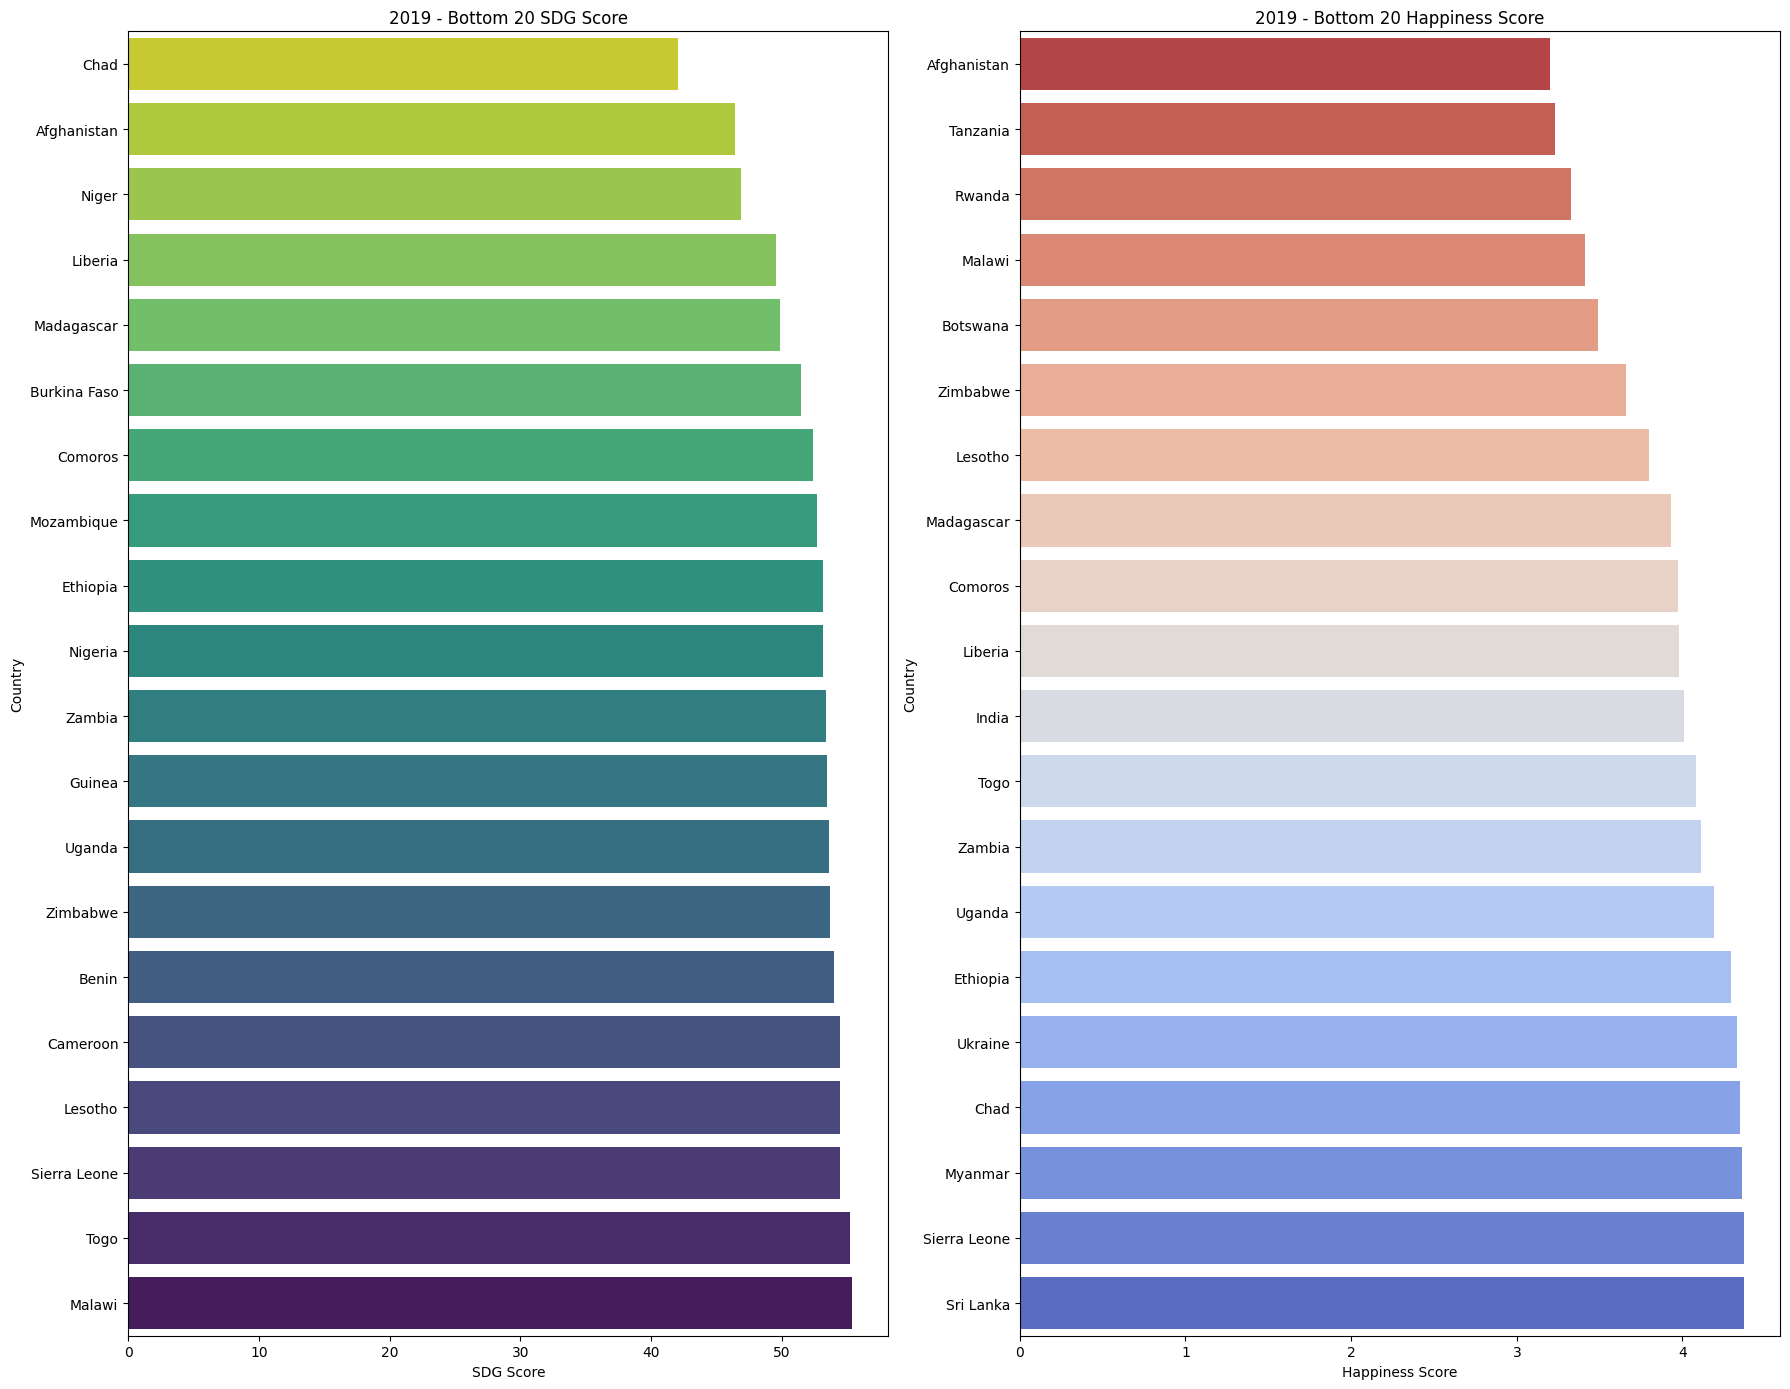

<ipython-input-22-f9c43b933dde>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='SDG Score', data=worst_sdg, ax=axes[0], palette='viridis_r')
<ipython-input-22-f9c43b933dde>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='Happiness score', data=worst_happy, ax=axes[1], palette='coolwarm_r')


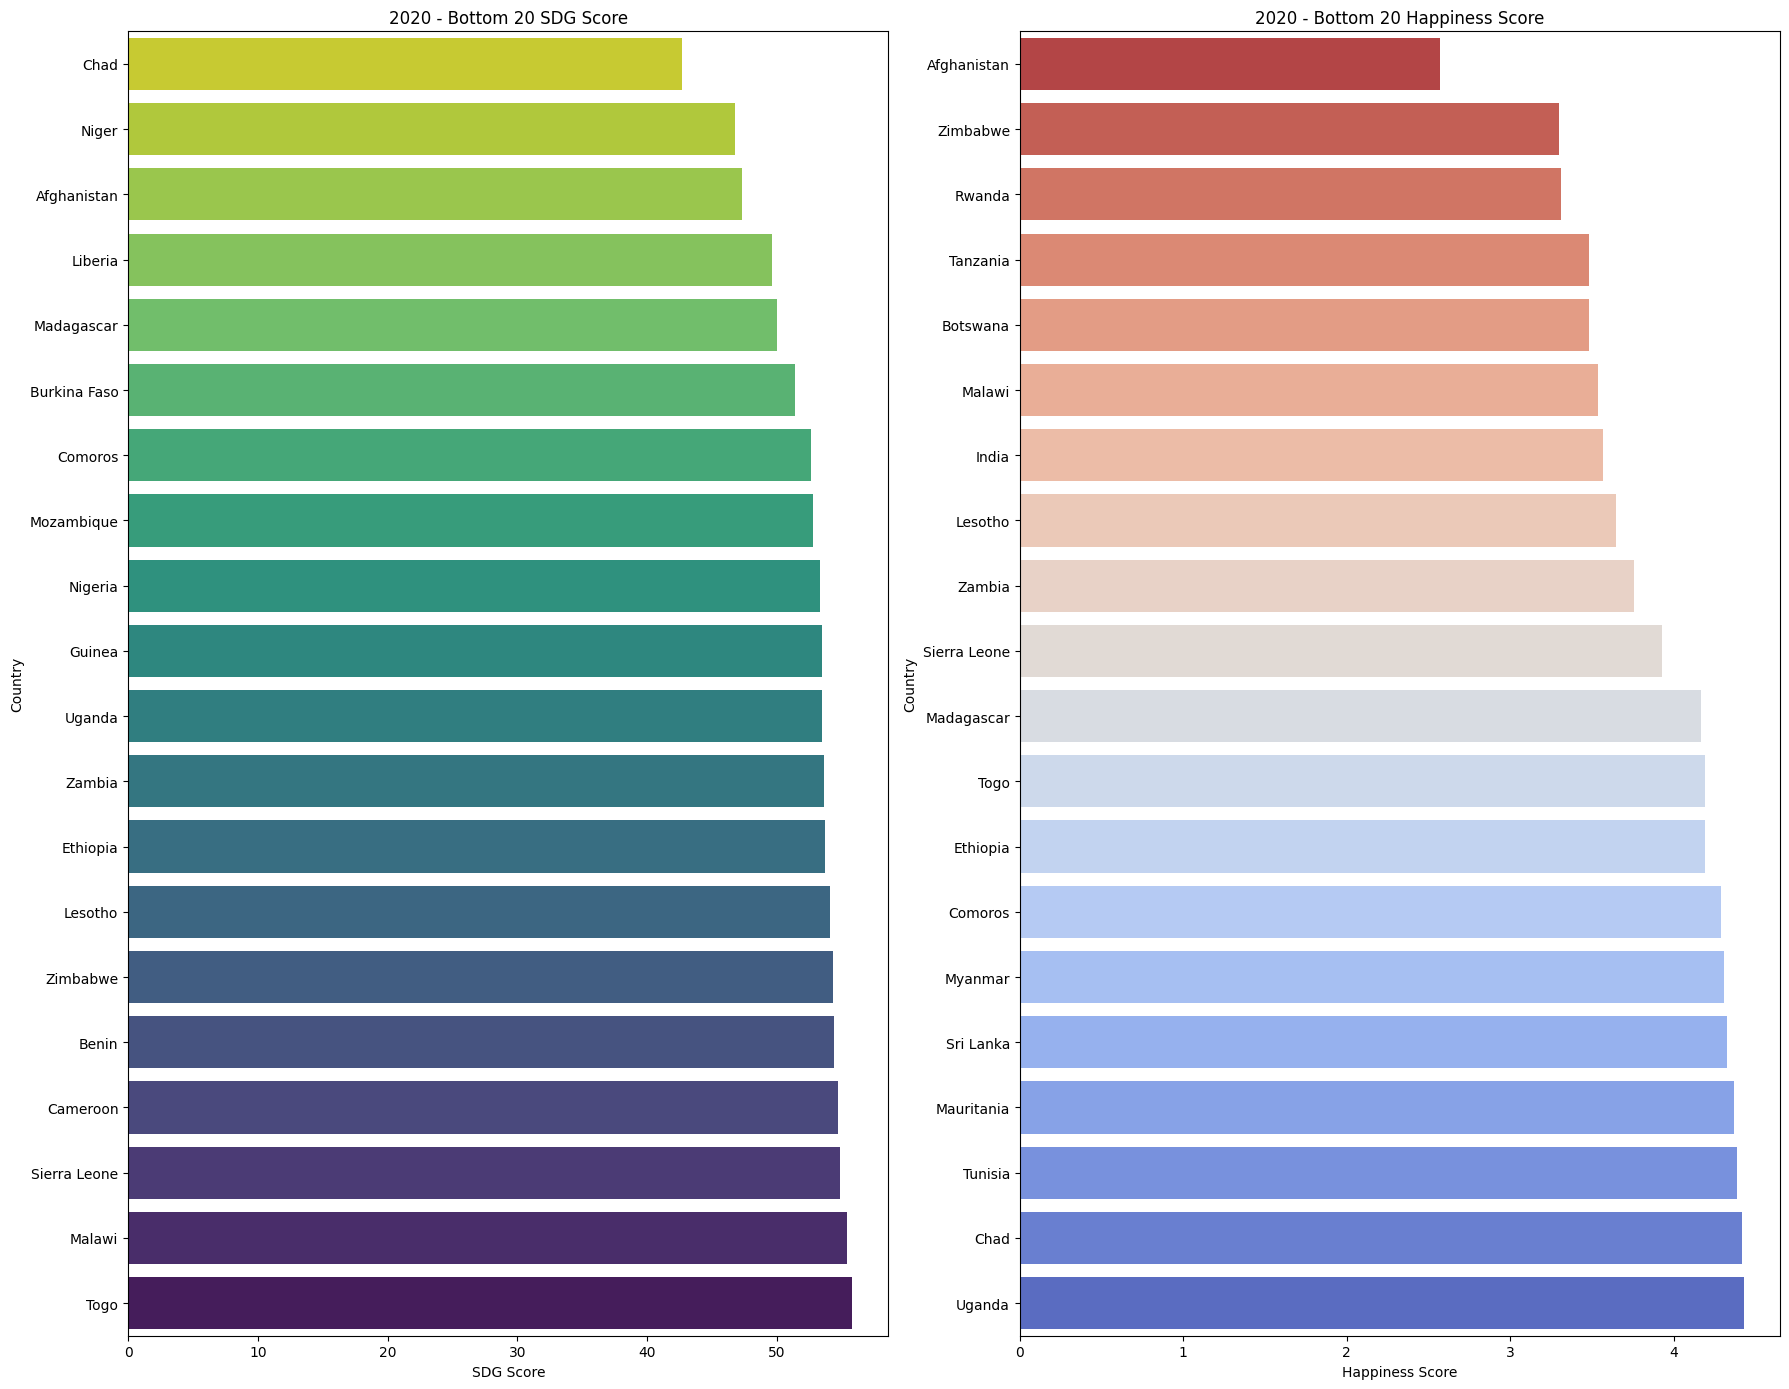

<ipython-input-22-f9c43b933dde>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='SDG Score', data=worst_sdg, ax=axes[0], palette='viridis_r')
<ipython-input-22-f9c43b933dde>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='Happiness score', data=worst_happy, ax=axes[1], palette='coolwarm_r')


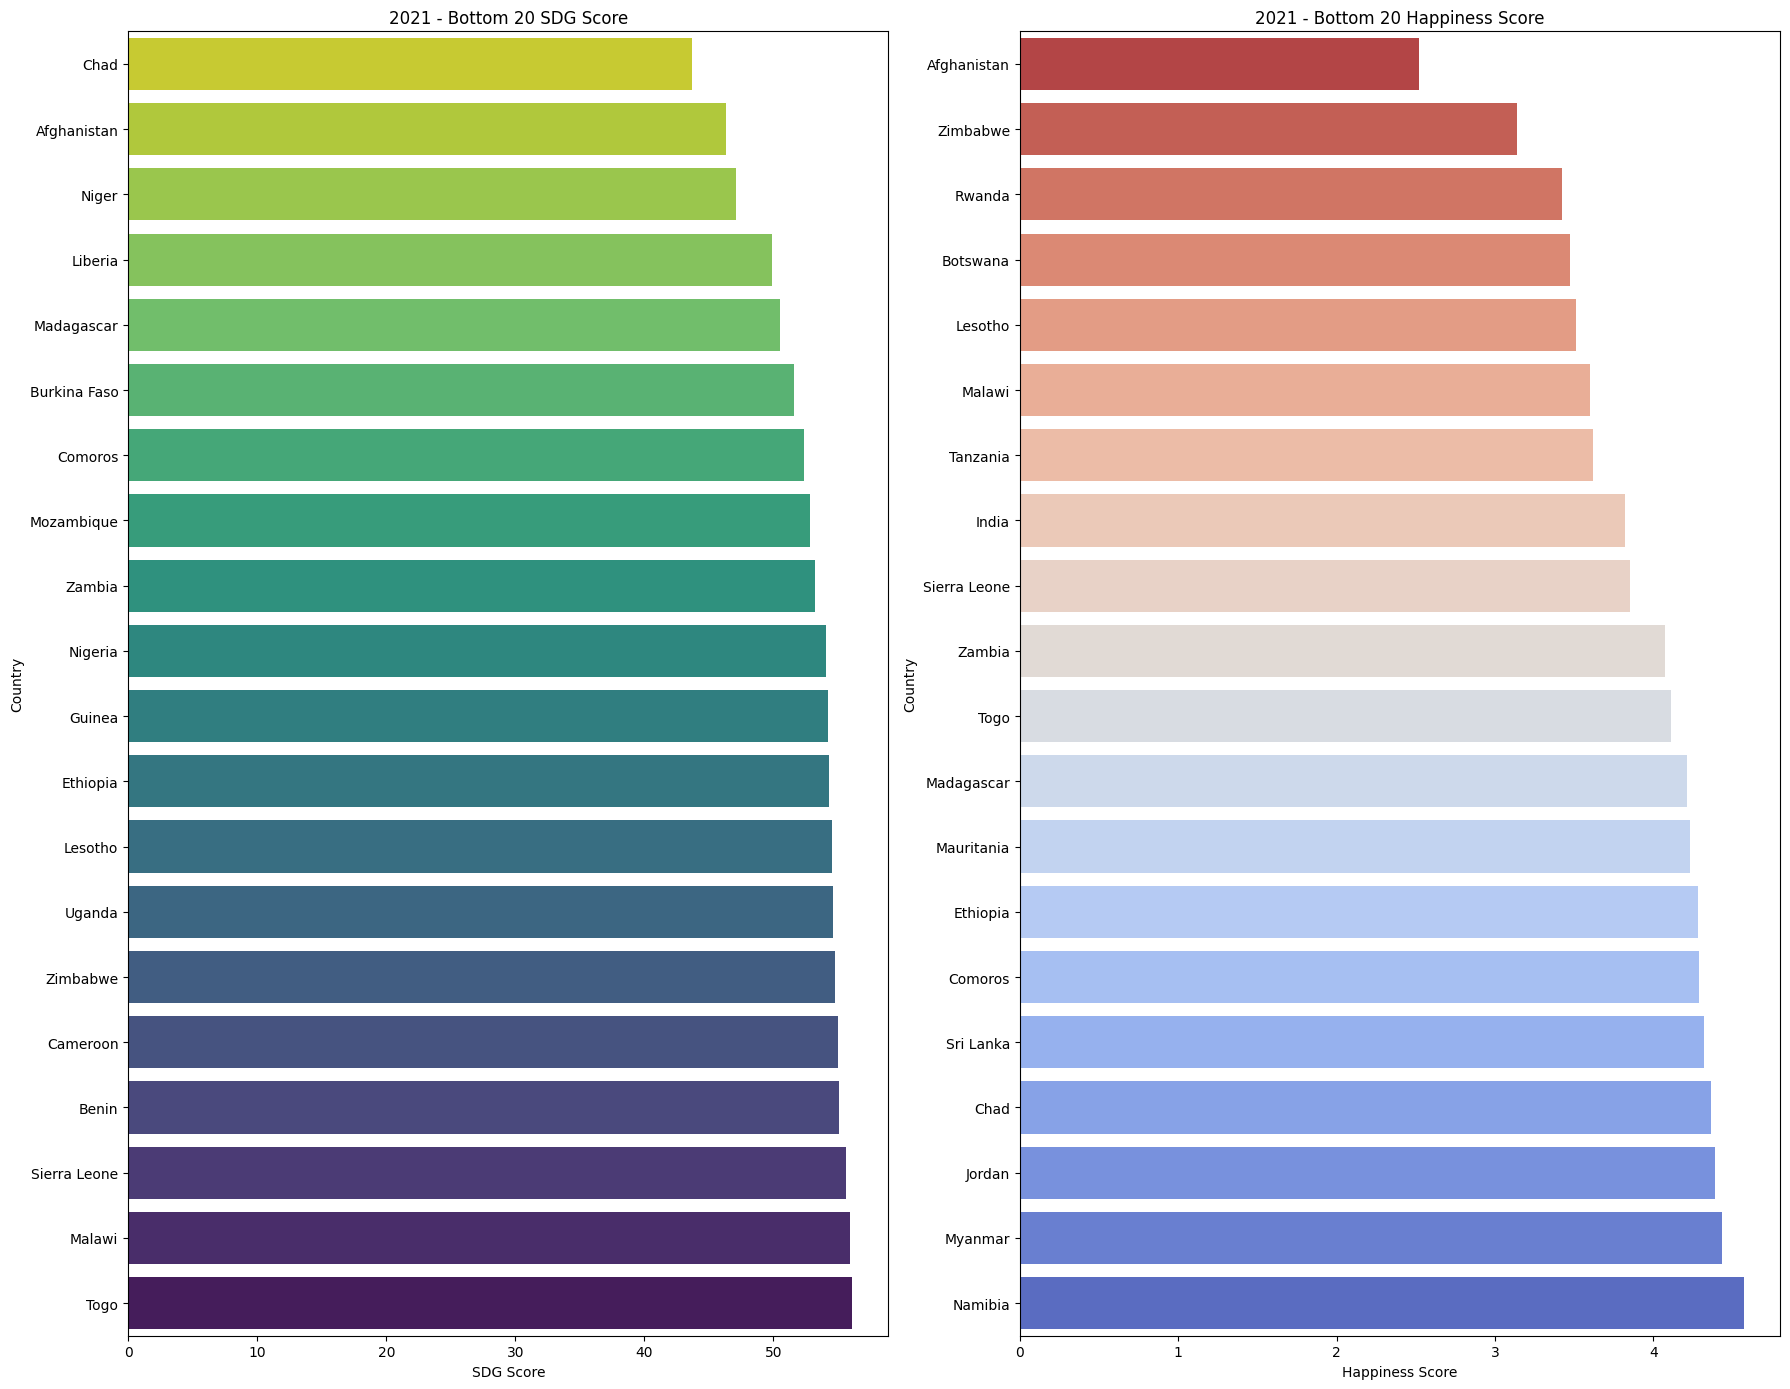

<ipython-input-22-f9c43b933dde>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='SDG Score', data=worst_sdg, ax=axes[0], palette='viridis_r')
<ipython-input-22-f9c43b933dde>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='Happiness score', data=worst_happy, ax=axes[1], palette='coolwarm_r')


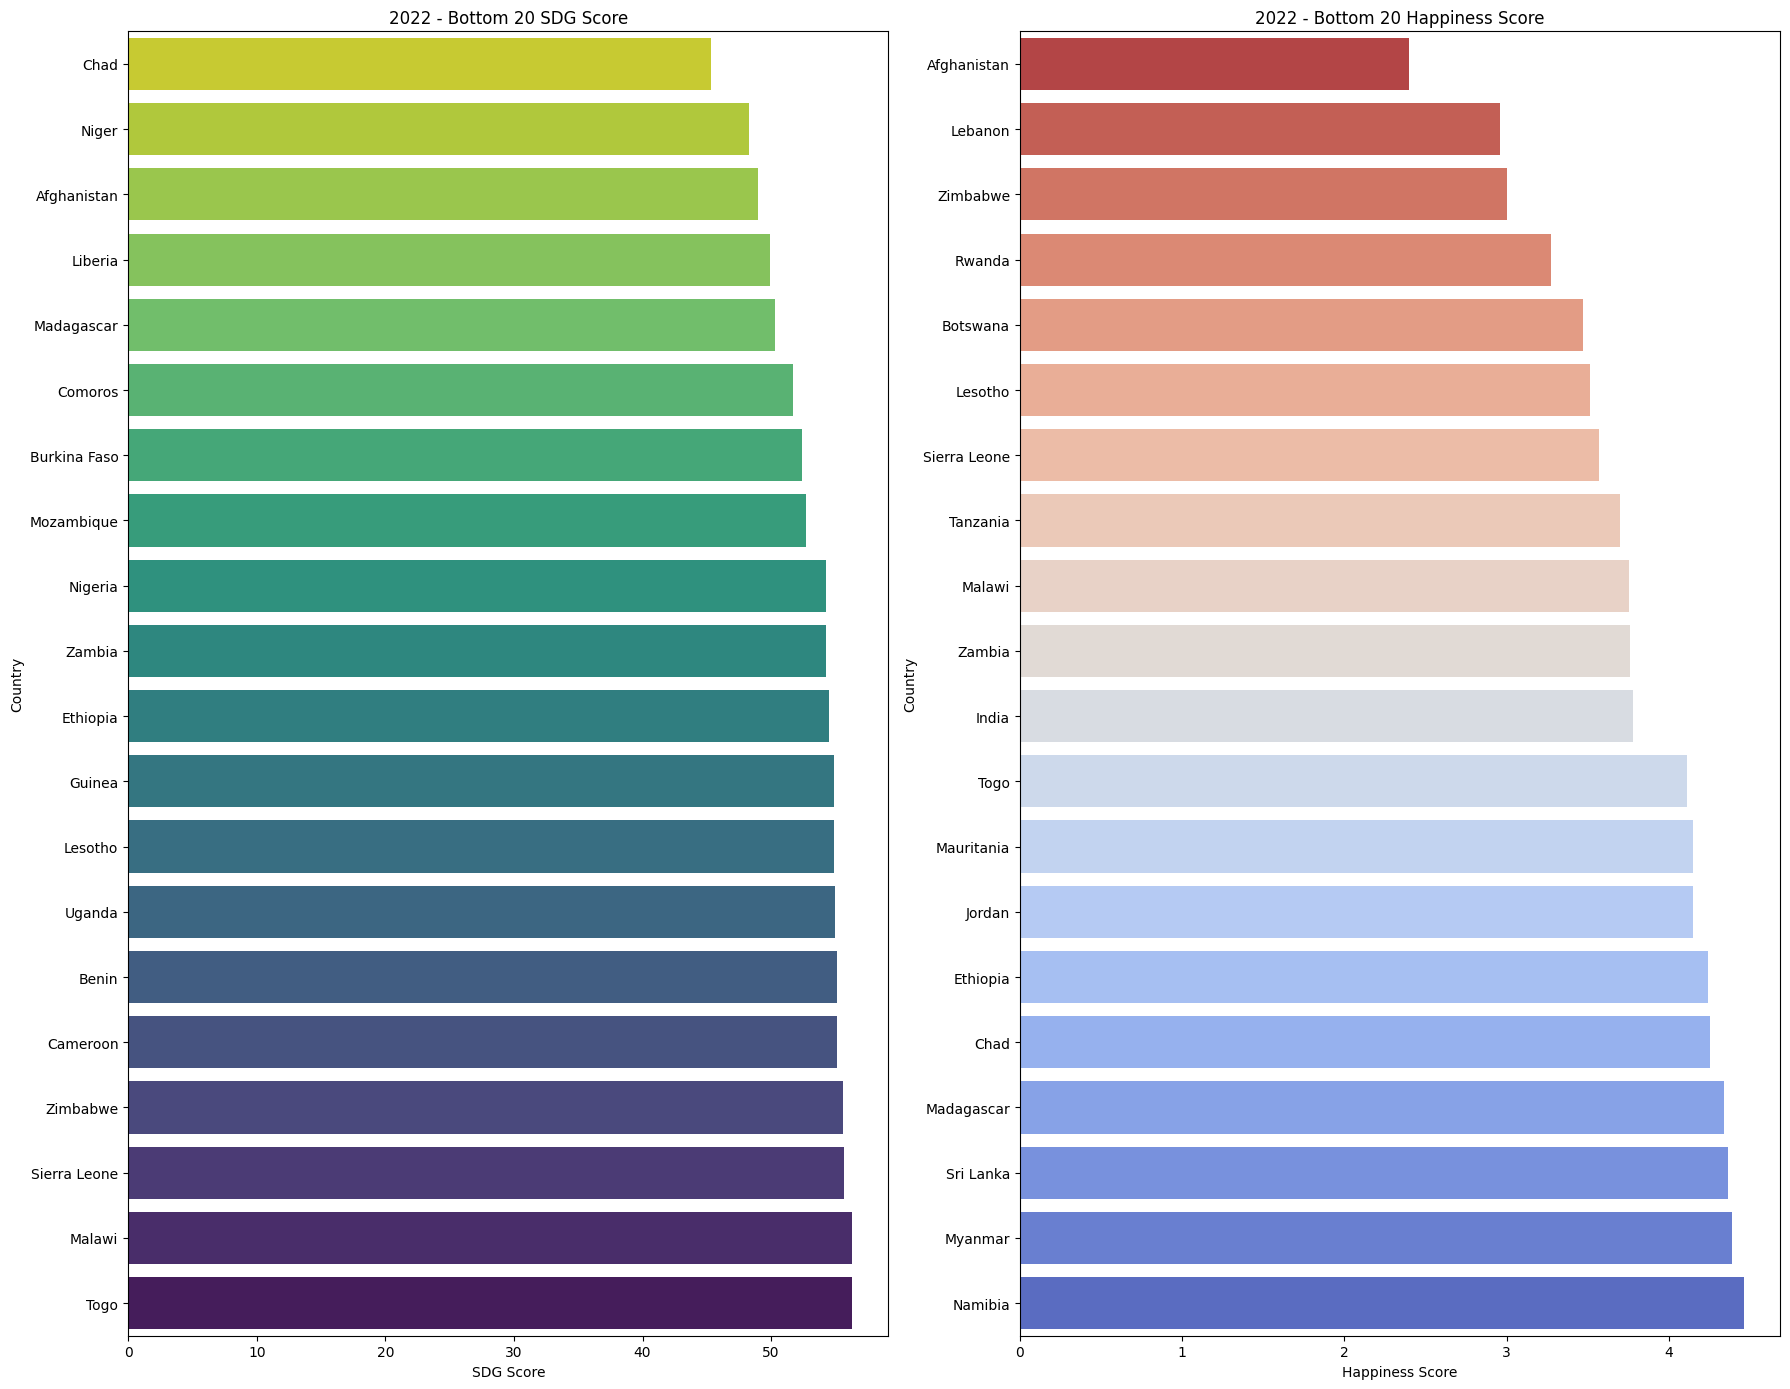

In [ ]:
for year in years:
  data_year = df[df['Year'] == year]
  fig, axes = plt.subplots(1, 2, figsize=(18, 14))

  worst_sdg = data_year.sort_values(by='SDG Score', ascending=True).head(20)
  worst_happy = data_year.sort_values(by='Happiness score', ascending=True).head(20)

  sns.barplot(y='Country', x='SDG Score', data=worst_sdg, ax=axes[0], palette='viridis_r')
  axes[0].set_title(f"{year} - Bottom 20 SDG Score")
  axes[0].set_xlabel("SDG Score")
  axes[0].set_ylabel("Country")

  sns.barplot(y='Country', x='Happiness score', data=worst_happy, ax=axes[1], palette='coolwarm_r')
  axes[1].set_title(f"{year} - Bottom 20 Happiness Score")
  axes[1].set_xlabel("Happiness Score")
  axes[1].set_ylabel("Country")

  plt.tight_layout()
  plt.show()

### Scatter Plot of SDG Scores vs Happiness Scores (2019-2022)

This scatter plots below, visualizes the relationship between countries' Sustainable Development Goal (SDG) scores and Happiness scores both expressed as percentages in 2019, 2020, 2021 and 2022. Each dot represents a country, and the position of the dot reflects its respective SDG and Happiness scores. The overall upward trend in the data suggests a positive correlation: countries with higher SDG performance tend to report higher happiness levels.

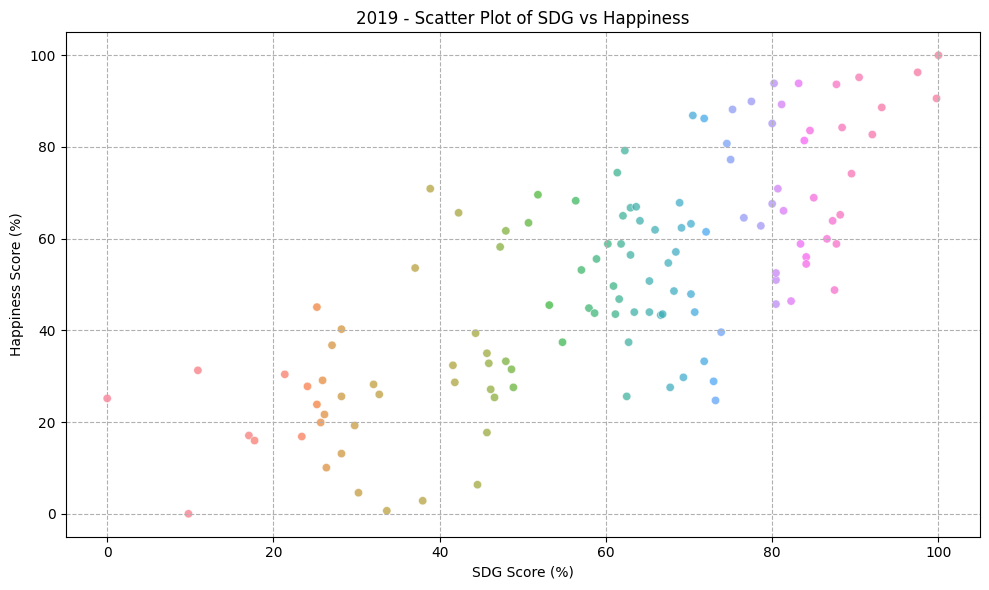

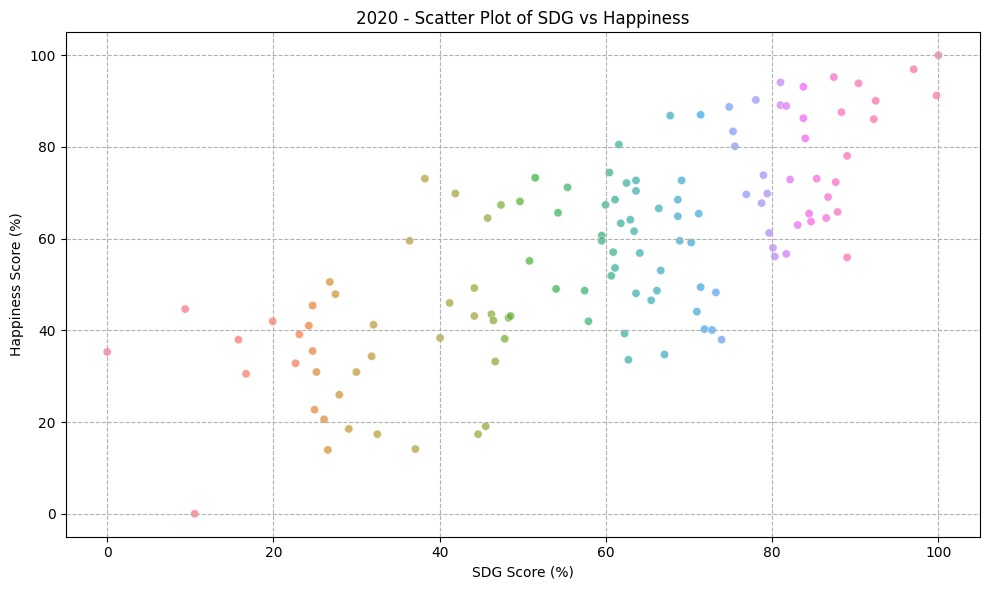

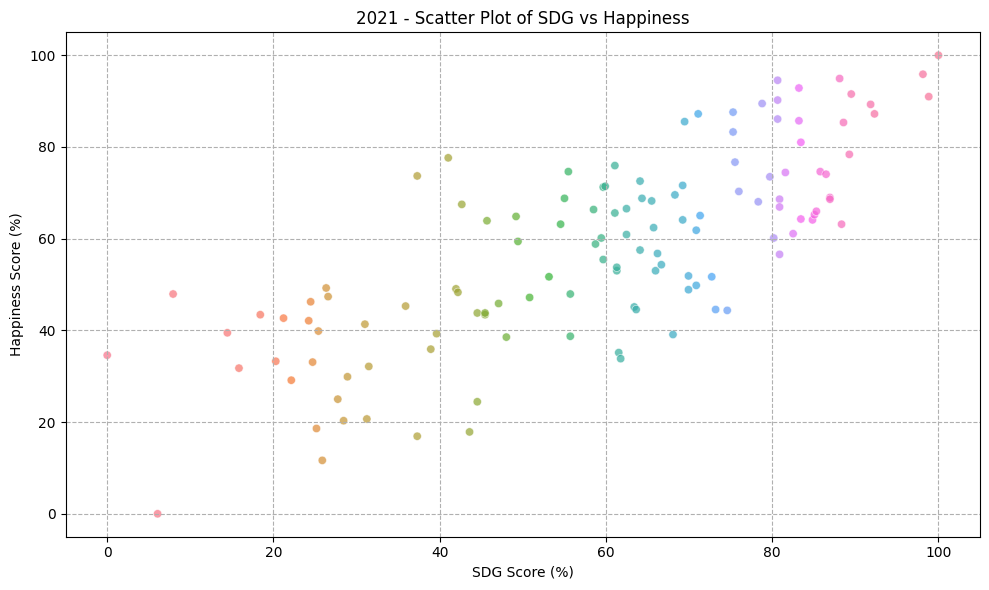

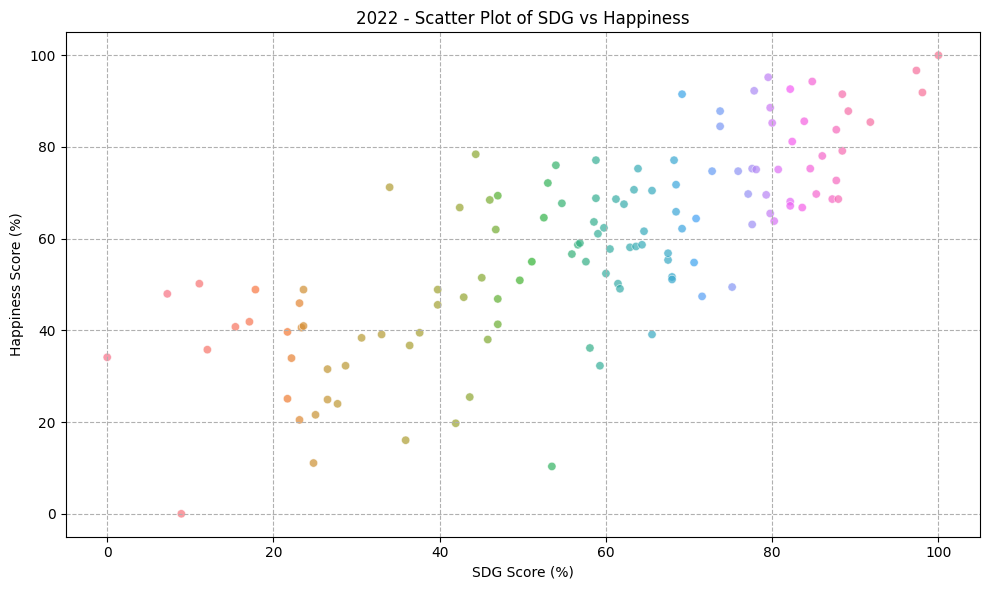

In [ ]:
for year in years:
    plt.figure(figsize=(10, 6))
    data = df_normalized[df_normalized['Year'] == year]
    sns.scatterplot(data=data,
                    x='SDG Score %',
                    y='Happiness score %',
                    hue='Country',  # Optional, can be removed for uniform color
                    legend=False,
                    alpha=0.7)
    plt.title(f"{year} - Scatter Plot of SDG vs Happiness")
    plt.xlabel("SDG Score (%)")
    plt.ylabel("Happiness Score (%)")
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()


### Yearly Pearson Correlation Between SDG Scores and Happiness Scores

This line chart shows the **Pearson correlation coefficients** between Sustainable Development Goal (SDG) scores and Happiness scores for each year. A consistently *strong positive correlation* across all years indicates a stable relationship: as countries perform better on SDG indicators, they also tend to report higher happiness levels. While slight variations exist, the correlation remains significantly positive, suggesting that sustainable development progress is a reliable predictor of national well-being over time. This trend reinforces the importance of aligning policy with long-term development goals to foster societal happiness.

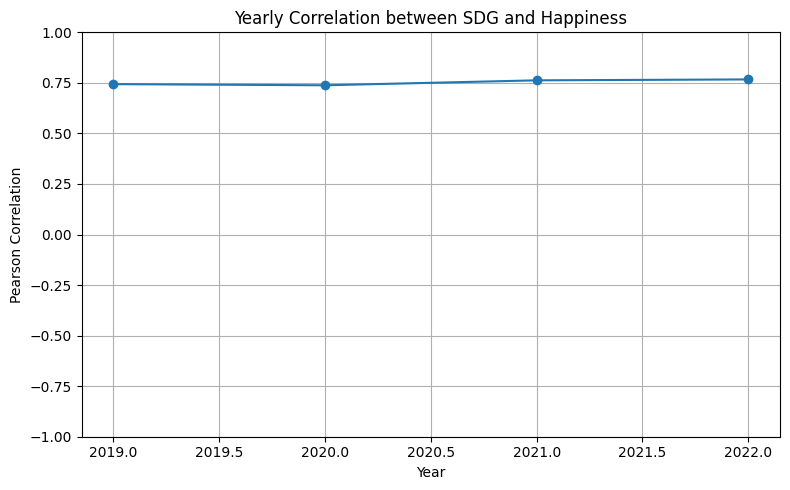

In [ ]:
corr_values = []
for year in years:
    data = df[df['Year'] == year]
    corr = data[['SDG Score', 'Happiness score']].corr().iloc[0, 1]
    corr_values.append(corr)

plt.figure(figsize=(8, 5))
plt.plot(years, corr_values, marker='o')
plt.title("Yearly Correlation between SDG and Happiness")
plt.xlabel("Year")
plt.ylabel("Pearson Correlation")
plt.grid(True)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()


### Correlation Heatmap Between SDG Score and Happiness Score

This heatmap shows the Pearson correlation coefficient between SDG scores and Happiness scores across the entire dataset. The value of **0.75** indicates a strong positive linear relationship—as countries perform better on Sustainable Development Goals, they also tend to report higher happiness levels.

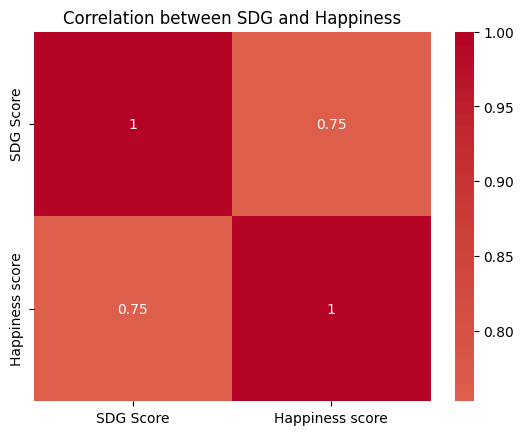

In [ ]:
corr = df[['SDG Score', 'Happiness score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation between SDG and Happiness")
plt.show()


> # Hypothesis Testing

> **Goal:** To test whether there is a statistically significant correlation between SDG Score and Happiness Score in the year 2022.
>
> - **Null Hypothesis (H₀):** There is no significant correlation between SDG Score and Happiness Score.
> - **Alternative Hypothesis (H₁):** There is a significant correlation between SDG Score and Happiness Score.
>
> The test used is **Pearson Correlation**, which measures the linear relationship between the two scores.
> - **Interpretation:** If the p-value < 0.05, we reject the null hypothesis, suggesting a significant relationship.


In [ ]:

from scipy.stats import pearsonr, ttest_ind

for year in df['Year'].unique():
    data = df[df['Year'] == year]
    corr, p_value = pearsonr(data['SDG Score'], data['Happiness score'])
    print(f"{year}: Correlation = {corr:.4f}, P-value = {p_value:.2e}")
    if p_value < 0.05:
        print("  → Statistically significant correlation between happiness scores and SDG scores, reject H0.")
    else:
        print("  → Not statistically significant correlation between happiness scores and SDG scores, fail to reject H0.")
    print()

2019: Correlation = 0.7438, P-value = 4.39e-23
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2020: Correlation = 0.7381, P-value = 1.37e-22
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2021: Correlation = 0.7626, P-value = 7.83e-25
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2022: Correlation = 0.7671, P-value = 2.81e-25
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.




> ### 🔬 Additional Hypothesis Test: T-Test
> **Goal:** To test if there is a significant difference in happiness scores between countries with high and low SDG scores between 2019-2022.
>
> - **Null Hypothesis (H₀):** There is no significant difference in happiness scores between the two groups.
> - **Alternative Hypothesis (H₁):** There is a significant difference in happiness scores.
>
> The groups are formed using the **median SDG score** as a cutoff.  
> The test used is the **Welch’s T-test**, which does not assume equal variances.
> - **Interpretation:** If the p-value < 0.05, we reject H₀ and conclude a significant difference.


In [ ]:
from scipy.stats import ttest_ind

for year in df['Year'].unique():
    data_year = df[df['Year'] == year]

    median_sdg = data_year['SDG Score'].median()
    high_sdg_group = data_year[data_year['SDG Score'] > median_sdg]['Happiness score']
    low_sdg_group = data_year[data_year['SDG Score'] <= median_sdg]['Happiness score']

    t_stat, p_val = ttest_ind(high_sdg_group, low_sdg_group, equal_var=False)

    print(f"{year}:")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_val:.4e}")
    if p_val < 0.05:
        print("  → Statistically significant correlation between happiness scores and SDG scores, reject H0.")
    else:
        print("  → No statistically significant correlation between happiness scores and SDG scores, fail to reject H0.")
    print()


2019:
  T-statistic: 7.7224
  P-value: 3.5480e-12
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2020:
  T-statistic: 7.8367
  P-value: 1.9922e-12
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2021:
  T-statistic: 8.4145
  P-value: 9.2259e-14
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2022:
  T-statistic: 9.1004
  P-value: 3.0752e-15
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.



# Summary of Hypothesis Testing
1. Correlation Analysis (Pearson's r):

  For each year, we calculated the Pearson correlation coefficient between countries' SDG Scores and Happiness Scores.

  Result: There was a consistently strong and statistically significant positive correlation across all years (typically r > 0.7, p < 0.0001).

  Interpretation: Countries that perform better in sustainable development (higher SDG scores) tend to also report higher happiness levels.

2. T-Test Analysis (Difference in Means):
  For each year, we divided countries into two groups: those above and below the median SDG score. We then performed a Welch’s t-test to compare the average happiness scores of these two groups.

  Result: In most years, there was a statistically significant difference in mean happiness scores between the high-SDG and low-SDG countries.

  Interpretation: On average, countries with better sustainable development metrics have higher happiness levels.


# Final Observations & Insights
There is a robust positive relationship between sustainable development and national happiness.
While correlation does not imply causation, the consistency of both correlation and t-test results across years strengthens the evidence of a meaningful connection.